<a href="https://colab.research.google.com/github/Edenshmuel/ICU_Nutrition_ML/blob/main/Patient_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Loading Preprocessing Pipeline from GitHub**

In [3]:
import requests
import nbformat
from nbconvert import PythonExporter

url = "https://raw.githubusercontent.com/Edenshmuel/ICU_Nutrition_ML/refs/heads/main/Pipeline.ipynb"

response = requests.get(url)

if response.status_code == 200:
    notebook_content = response.text
    notebook = nbformat.reads(notebook_content, as_version=4)
    python_exporter = PythonExporter()
    source, _ = python_exporter.from_notebook_node(notebook)
    exec(source)

    print("Pipeline loaded successfully from GitHub!")
else:
    print(f"Failed to fetch notebook: {response.status_code}")

Pipeline loaded successfully from GitHub!


**Importing the Data**

Importing Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

Cloning the Project Repository

In [5]:
!git clone https://github.com/Edenshmuel/ICU_Nutrition_ML.git

Cloning into 'ICU_Nutrition_ML'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 180 (delta 78), reused 41 (delta 41), pack-reused 76 (from 1)
Receiving objects: 100% (180/180), 1.85 MiB | 20.63 MiB/s, done.
Resolving deltas: 100% (108/108), done.


Loading the Dataset

In [22]:
df = pd.read_csv("https://raw.githubusercontent.com/Edenshmuel/ICU_Nutrition_ML/refs/heads/main/Food_and_Nutrition__.csv")
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


**Data Preprocessing**

Categorize Features

In [23]:
numerical_features = ["Ages", "Height", "Weight", "Sugar", "Carbohydrates", "Fiber"]
categorical_features = ["Gender", "Dietary Preference"]
Multy_categorical_features = ["Disease"]
ordinal_features = ["Activity Level"]
right_skewed_features = ["Protein", "Sodium", "Daily Calorie Target", "Fat"]

Removing Non-Contributing Columns

In [24]:
columns_to_remove = ["Calories", "Breakfast Suggestion", "Lunch Suggestion",
                     "Dinner Suggestion", "Snack Suggestion"]

df = df.drop(columns=columns_to_remove)

**Apply the Pipeline**

In [25]:
preprocessor = create_preprocessor(numerical_features, categorical_features, Multy_categorical_features, ordinal_features, right_skewed_features)
df_transformed_array = preprocessor.fit_transform(df)
feature_names = get_feature_names(preprocessor, df.columns)

In [26]:
df_transformed = pd.DataFrame(df_transformed_array, columns=feature_names)
df_transformed.head()

,Protein,Sodium,Daily Calorie Target,Fat,Activity Level,Ages,Height,Weight,BMI,Sugar,...,Dietary Preference_Pescatarian,Dietary Preference_Vegan,Dietary Preference_Vegetarian,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss
0,0.464201,0.456658,0.395588,0.436808,2.0,0.218183,0.633571,0.561175,0.567524,0.568210,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.248564,0.242139,0.222768,0.180422,1.0,0.384024,0.331118,0.332526,0.394498,0.395216,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.367128,0.359677,0.469411,0.487647,0.0,0.659008,0.535632,0.750865,0.709128,0.709672,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.546390,0.539214,0.568428,0.619805,3.0,0.751893,0.224192,0.414058,0.828988,0.829344,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.248564,0.242139,0.395588,0.381619,0.0,0.833824,0.434870,0.628051,0.567524,0.568210,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Exploratory Data Analysis - EDA**

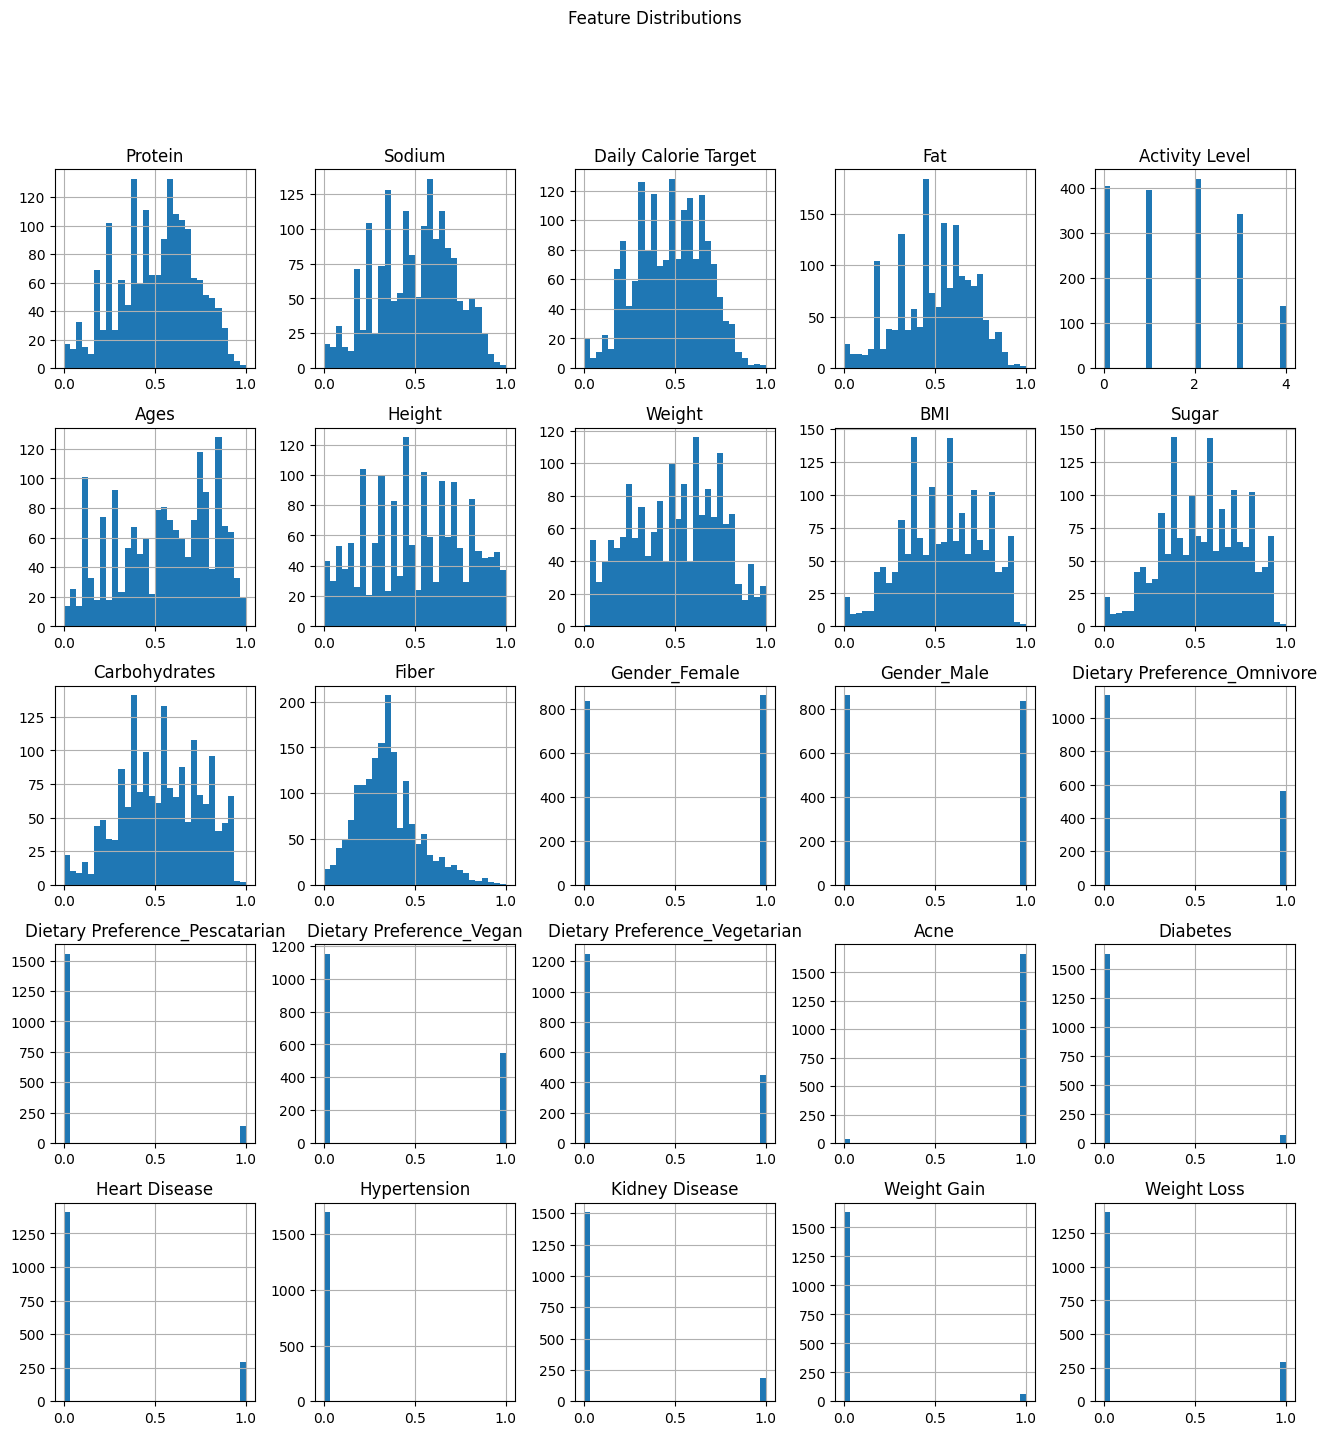

In [27]:
df_transformed.hist(figsize=(16, 16), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

In [28]:
print(df_transformed.describe())

           Protein       Sodium  Daily Calorie Target          Fat  \
count  1698.000000  1698.000000           1698.000000  1698.000000   
mean      0.506249     0.500140              0.471959     0.501230   
std       0.210577     0.210896              0.191921     0.202863   
min       0.000000     0.000000              0.000000     0.000000   
25%       0.367128     0.359677              0.313986     0.346088   
50%       0.530927     0.523654              0.469411     0.525618   
75%       0.662459     0.656386              0.624881     0.658459   
max       1.000000     1.000000              1.000000     1.000000   

       Activity Level         Ages       Height       Weight          BMI  \
count     1698.000000  1698.000000  1698.000000  1698.000000  1698.000000   
mean         1.655477     0.552088     0.508032     0.508141     0.544697   
std          1.261238     0.262225     0.268337     0.242593     0.219749   
min          0.000000     0.000000     0.000000     0.000000 

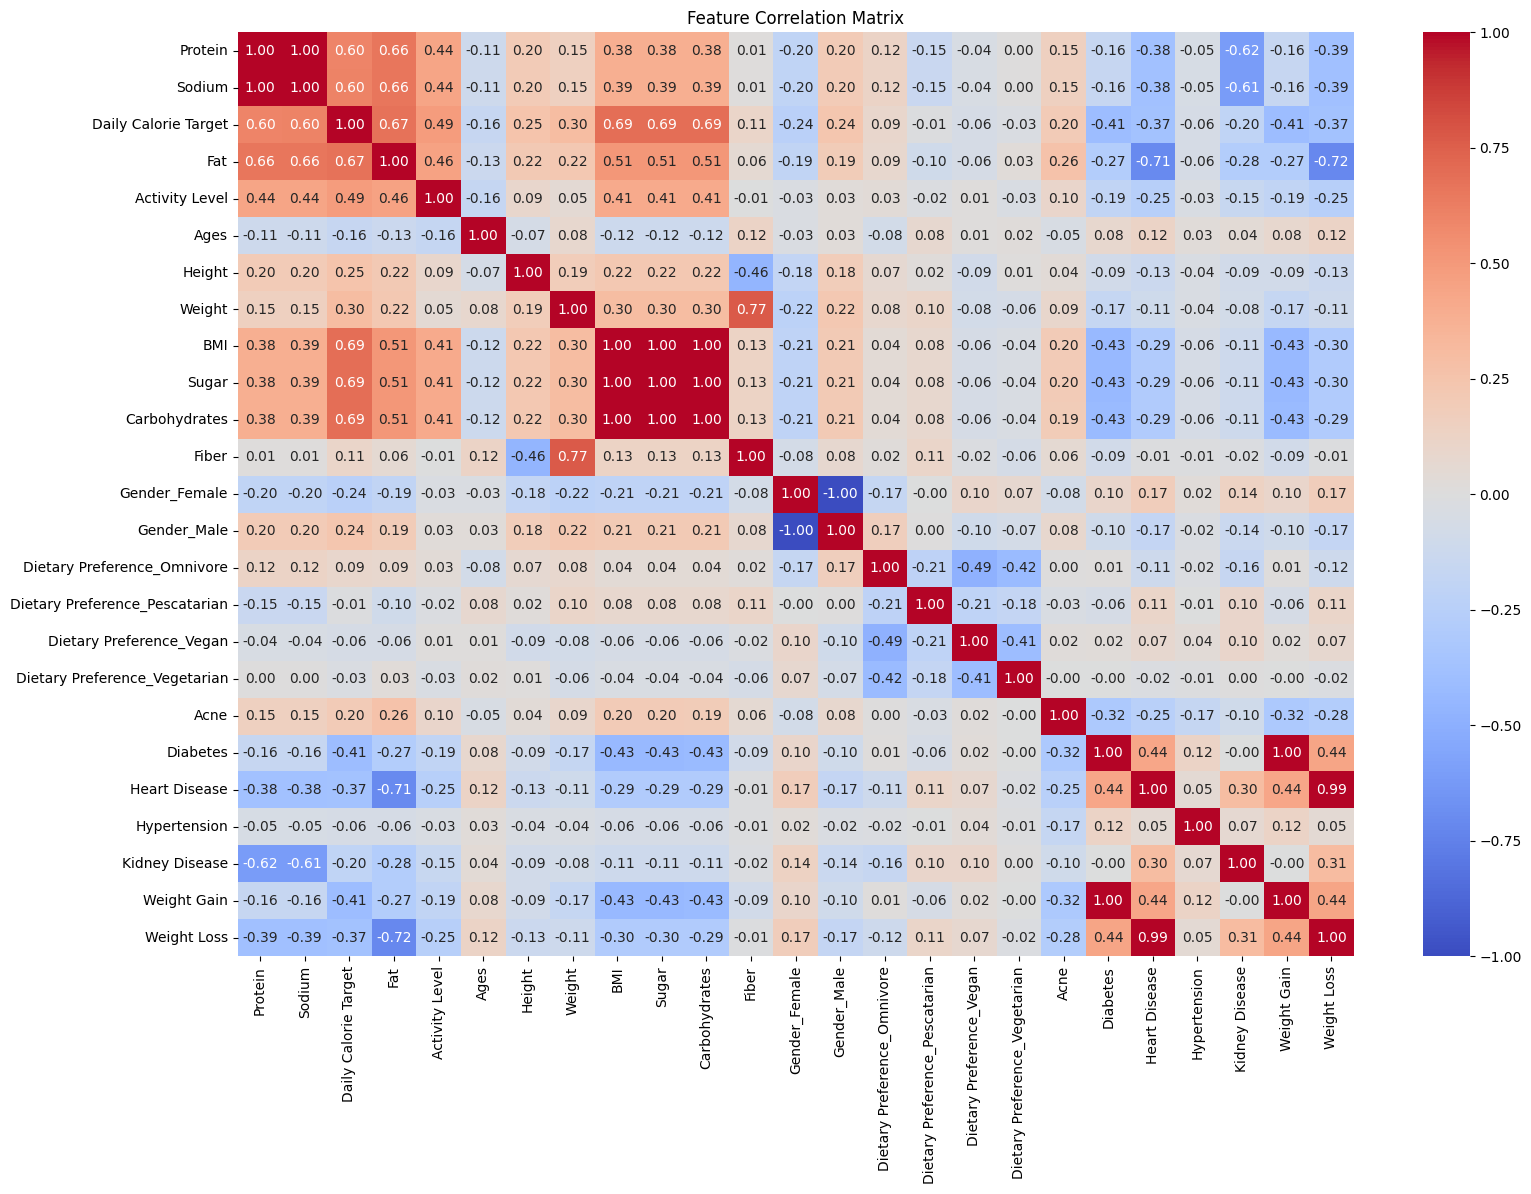

In [29]:
corr_matrix = df_transformed.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

### Data Exploration Summary

From the EDA, I observed that most numerical features follow a normal distribution. None of the columns has a standard deviation of zero, indicating that all features contribute some variability to the dataset. Additionally, the correlation matrix did not reveal any strong correlations (above 0.85), except between gender-related columns and between heart disease and weight loss, which may indicate some redundancy. Therefore, I will begin the clustering process without applying PCA. If the clustering results are suboptimal, I will consider applying PCA to improve performance.


**Clustering**

To determine the optimal number of clusters (K), we will evaluate three different clustering validation metrics:


1.   Elbow Method
2.   Silhouette Score
3.   Davies-Bouldin Index



Elbow Method

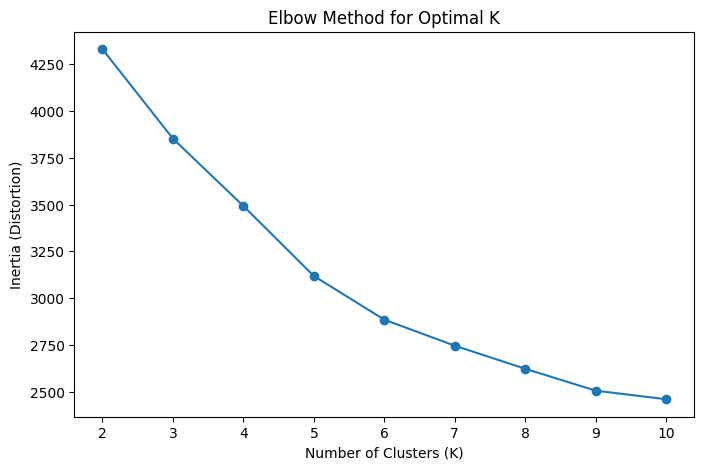

In [30]:
k_range = range(2, 11)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_transformed)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal K")
plt.show()

Silhouette Score

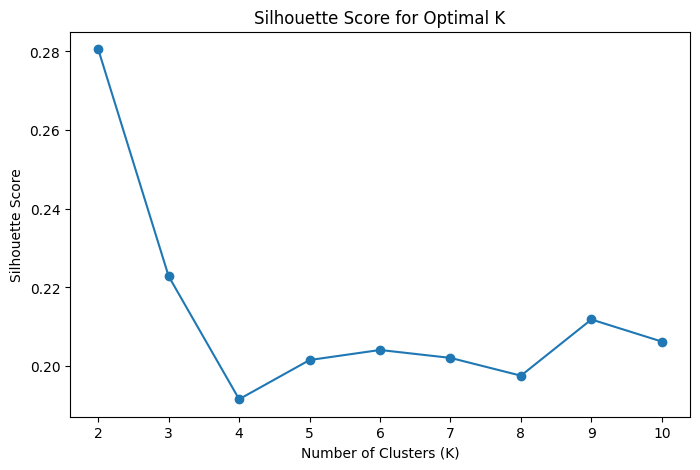

In [31]:
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)
    score = silhouette_score(df_transformed, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()

Davies-Bouldin Index

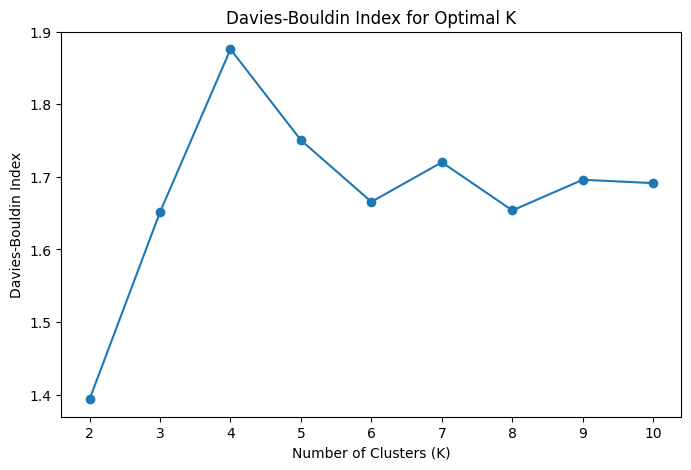

In [32]:
dbi_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)
    score = davies_bouldin_score(df_transformed, labels)
    dbi_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, dbi_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index for Optimal K")
plt.show()

    K  Silhouette Score  Davies-Bouldin Index      Inertia
0   2          0.280560              1.393629  4330.051494
1   3          0.222848              1.651447  3852.452765
2   4          0.191601              1.875906  3492.147653
3   5          0.201561              1.750507  3118.119801
4   6          0.204118              1.665610  2884.534977
5   7          0.202106              1.720106  2745.471649
6   8          0.197587              1.653792  2622.148708
7   9          0.211871              1.696063  2505.044218
8  10          0.206251              1.691389  2459.246491


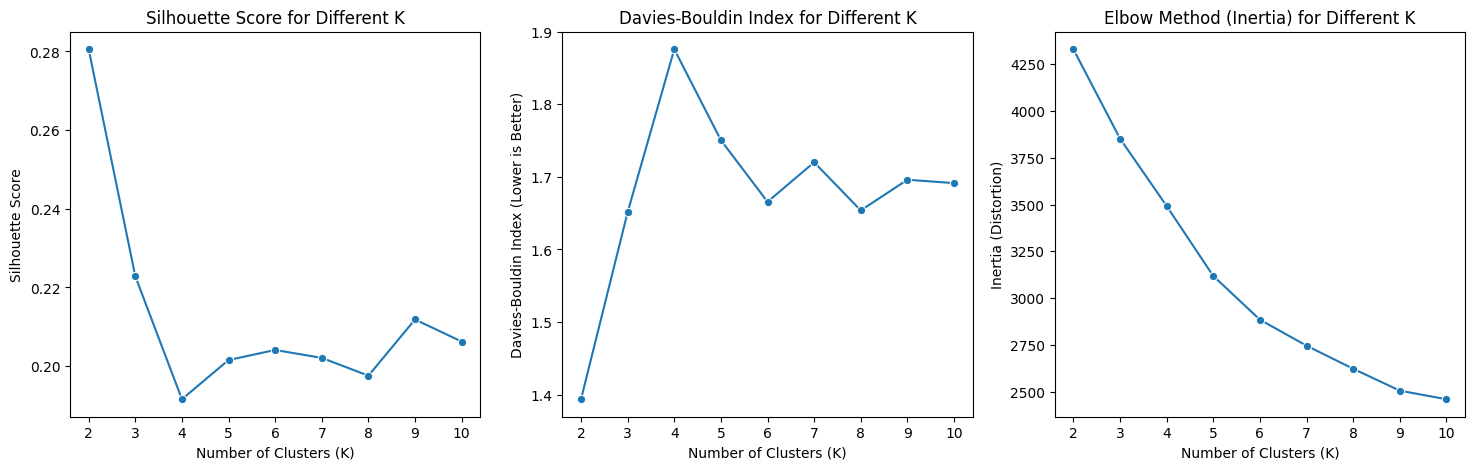

In [33]:
k_range = range(2, 11)
silhouette_scores = []
dbi_scores = []
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_transformed)

    silhouette_scores.append(silhouette_score(df_transformed, labels))
    dbi_scores.append(davies_bouldin_score(df_transformed, labels))
    inertia_values.append(kmeans.inertia_)

metrics_df = pd.DataFrame({
    "K": list(k_range),
    "Silhouette Score": silhouette_scores,
    "Davies-Bouldin Index": dbi_scores,
    "Inertia": inertia_values})

print(metrics_df)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

#Silhouette Score
sns.lineplot(x=k_range, y=silhouette_scores, marker="o", ax=ax[0])
ax[0].set_title("Silhouette Score for Different K")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Silhouette Score")

#Davies-Bouldin Index
sns.lineplot(x=k_range, y=dbi_scores, marker="o", ax=ax[1])
ax[1].set_title("Davies-Bouldin Index for Different K")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Davies-Bouldin Index (Lower is Better)")

#Inertia (Elbow Method)
sns.lineplot(x=k_range, y=inertia_values, marker="o", ax=ax[2])
ax[2].set_title("Elbow Method (Inertia) for Different K")
ax[2].set_xlabel("Number of Clusters (K)")
ax[2].set_ylabel("Inertia (Distortion)")

plt.show()

Based on the evaluation metrics, the Silhouette Score and Davies-Bouldin Index both suggest that 2 clusters provide the best separation. However, the Elbow Method shows a noticeable inflection point around 4 to 5 clusters, indicating that these configurations may capture more structure in the data.

To balance separation quality and potential subgroup insights, I will explore both K=2 and K=5, assess their interpretability, and validate their usefulness for understanding patient dietary patterns.

### KMeans Labels

In [37]:
k_values = [2, 5]

df_clusters = df_transformed.copy()

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_clusters.drop(columns=[col for col in df_clusters.columns if col.startswith("Cluster_K")]))
    df_clusters[f'Cluster_K{k}'] = labels

df_clusters.head()

,Protein,Sodium,Daily Calorie Target,Fat,Activity Level,Ages,Height,Weight,BMI,Sugar,...,Dietary Preference_Vegetarian,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss,Cluster_K2,Cluster_K5
0,0.464201,0.456658,0.395588,0.436808,2.0,0.218183,0.633571,0.561175,0.567524,0.568210,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,0.248564,0.242139,0.222768,0.180422,1.0,0.384024,0.331118,0.332526,0.394498,0.395216,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,2
2,0.367128,0.359677,0.469411,0.487647,0.0,0.659008,0.535632,0.750865,0.709128,0.709672,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
3,0.546390,0.539214,0.568428,0.619805,3.0,0.751893,0.224192,0.414058,0.828988,0.829344,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.248564,0.242139,0.395588,0.381619,0.0,0.833824,0.434870,0.628051,0.567524,0.568210,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4


I applied KMeans clustering with K=2 and K=5 to generate two different groupings of patients.
The cluster labels for each configuration were saved in new columns (Cluster_K2 and Cluster_K5) for further analysis and comparison.

### Cluster Profiles


In [41]:
def summarize_clusters(df, cluster_col):
    features_only = df.drop(columns=[col for col in df.columns if col.startswith("Cluster_K")])
    summary = df.groupby(cluster_col)[features_only.columns].mean()
    summary.index = [f"{cluster_col}_Cluster{i}" for i in summary.index]
    return summary.round(2)

summary_k2 = summarize_clusters(df_clusters, 'Cluster_K2')
summary_k5 = summarize_clusters(df_clusters, 'Cluster_K5')

comparison_df = pd.concat([summary_k2, summary_k5])

comparison_df

,Protein,Sodium,Daily Calorie Target,Fat,Activity Level,Ages,Height,Weight,BMI,Sugar,...,Dietary Preference_Pescatarian,Dietary Preference_Vegan,Dietary Preference_Vegetarian,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss
Cluster_K2_Cluster0,0.43,0.42,0.39,0.42,0.50,0.60,0.48,0.48,0.45,0.46,...,0.08,0.33,0.29,0.97,0.08,0.26,0.0,0.15,0.08,0.26
Cluster_K2_Cluster1,0.58,0.57,0.55,0.57,2.69,0.51,0.54,0.53,0.63,0.63,...,0.09,0.32,0.24,0.99,0.00,0.09,0.0,0.07,0.00,0.09
Cluster_K5_Cluster0,0.49,0.49,0.48,0.51,2.48,0.50,0.49,0.49,0.57,0.57,...,0.12,0.36,0.27,0.98,0.01,0.14,0.0,0.12,0.01,0.14
Cluster_K5_Cluster1,0.57,0.57,0.56,0.57,2.42,0.52,0.58,0.59,0.65,0.65,...,0.09,0.27,0.20,1.00,0.00,0.07,0.0,0.07,0.00,0.07
Cluster_K5_Cluster2,0.31,0.30,0.27,0.19,0.39,0.64,0.40,0.40,0.33,0.33,...,0.08,0.44,0.26,0.88,0.30,0.99,0.0,0.37,0.30,1.00
Cluster_K5_Cluster3,0.77,0.77,0.67,0.73,4.00,0.53,0.52,0.47,0.67,0.67,...,0.00,0.36,0.30,1.00,0.00,0.00,0.0,0.00,0.00,0.00
Cluster_K5_Cluster4,0.47,0.47,0.43,0.50,0.54,0.58,0.50,0.51,0.50,0.50,...,0.07,0.29,0.30,1.00,0.00,0.00,0.0,0.07,0.00,0.00


Although K=2 provides the best separation metrics, I chose to continue with **K=5** to explore potential **subgroup profiles** within the population.  
The 5-cluster configuration reveals meaningful distinctions in dietary intake, activity level, and health conditions that can support more personalized nutritional insights.


**PCA**

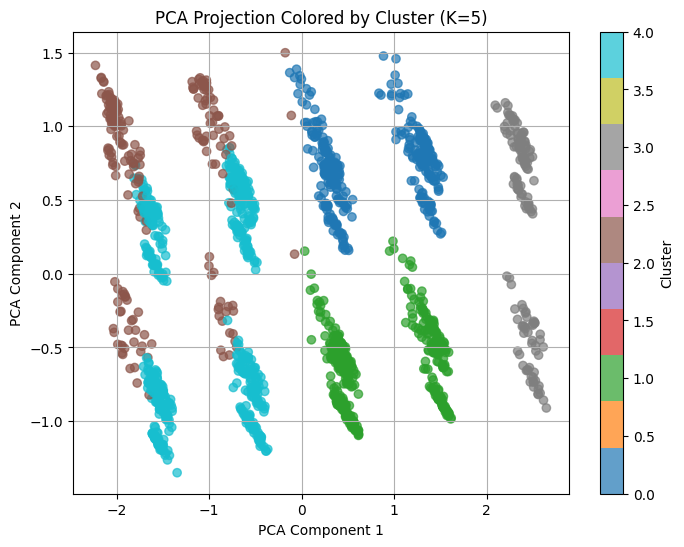

In [42]:
features = df_clusters.drop(columns=[col for col in df_clusters.columns if col.startswith("Cluster_K")])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clusters['Cluster_K5'], cmap='tab10', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection Colored by Cluster (K=5)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

The PCA projection shows that the 5 clusters are well-separated in the reduced feature space.  
Each cluster occupies a distinct region with minimal overlap, suggesting that the clustering is capturing meaningful structure in the data.  
This supports the decision to proceed with K=5 for further interpretation and subgroup analysis.


**t-SNE**

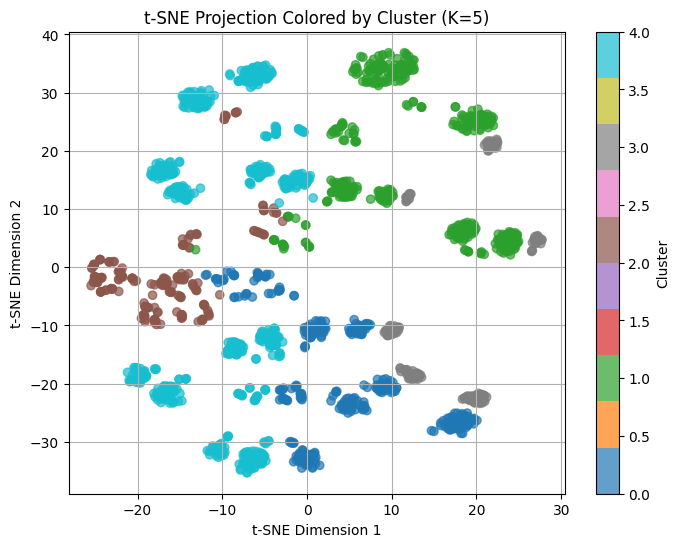

In [45]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=70, learning_rate=200)
X_tsne = tsne.fit_transform(features)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_clusters['Cluster_K5'], cmap='tab10', alpha=0.7)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projection Colored by Cluster (K=5)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

t-SNE with Perplexity = 70

Using a higher perplexity value of 70 yielded the most interpretable cluster visualization.  
The clusters are well-separated and internally cohesive, confirming the presence of distinct subgroup structures in the patient dataset.

In [46]:
feature_cols = [col for col in df_clusters.columns if not col.startswith("Cluster_K")]
features_only = df_clusters[feature_cols]

cluster_k5_means = df_clusters.groupby("Cluster_K5")[features_only.columns].mean().round(2)

display(cluster_k5_means)

,Protein,Sodium,Daily Calorie Target,Fat,Activity Level,Ages,Height,Weight,BMI,Sugar,...,Dietary Preference_Pescatarian,Dietary Preference_Vegan,Dietary Preference_Vegetarian,Acne,Diabetes,Heart Disease,Hypertension,Kidney Disease,Weight Gain,Weight Loss
Cluster_K5,,,,,,,,,,,,,,,,,,,,,
0,0.49,0.49,0.48,0.51,2.48,0.50,0.49,0.49,0.57,0.57,...,0.12,0.36,0.27,0.98,0.01,0.14,0.0,0.12,0.01,0.14
1,0.57,0.57,0.56,0.57,2.42,0.52,0.58,0.59,0.65,0.65,...,0.09,0.27,0.20,1.00,0.00,0.07,0.0,0.07,0.00,0.07
2,0.31,0.30,0.27,0.19,0.39,0.64,0.40,0.40,0.33,0.33,...,0.08,0.44,0.26,0.88,0.30,0.99,0.0,0.37,0.30,1.00
3,0.77,0.77,0.67,0.73,4.00,0.53,0.52,0.47,0.67,0.67,...,0.00,0.36,0.30,1.00,0.00,0.00,0.0,0.00,0.00,0.00
4,0.47,0.47,0.43,0.50,0.54,0.58,0.50,0.51,0.50,0.50,...,0.07,0.29,0.30,1.00,0.00,0.00,0.0,0.07,0.00,0.00


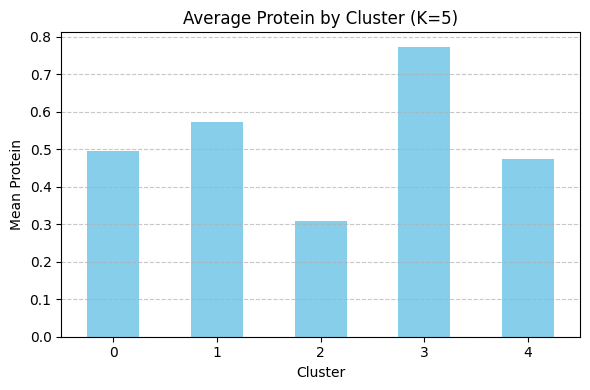

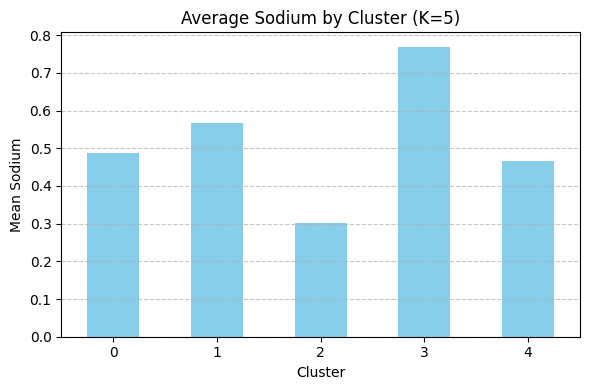

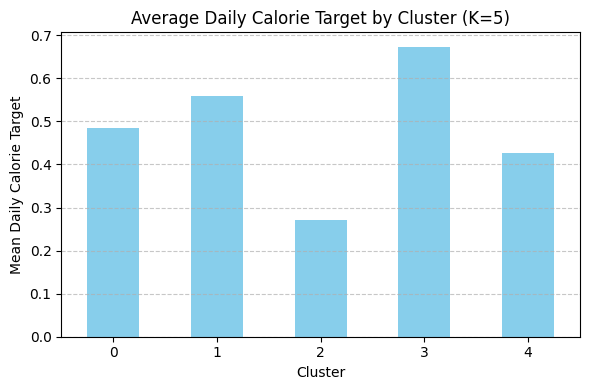

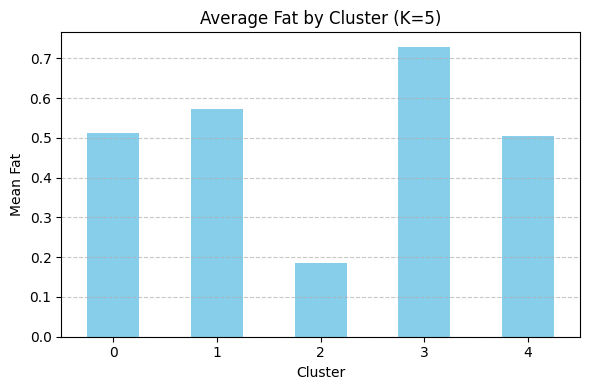

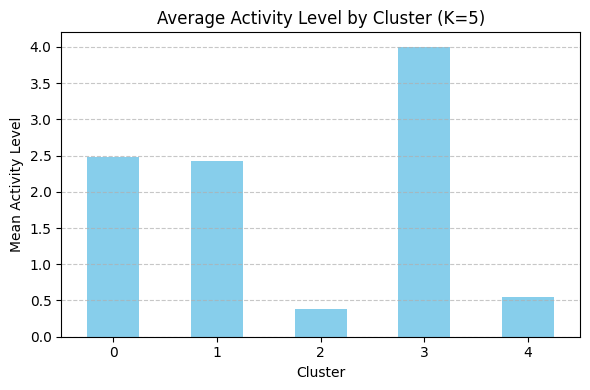

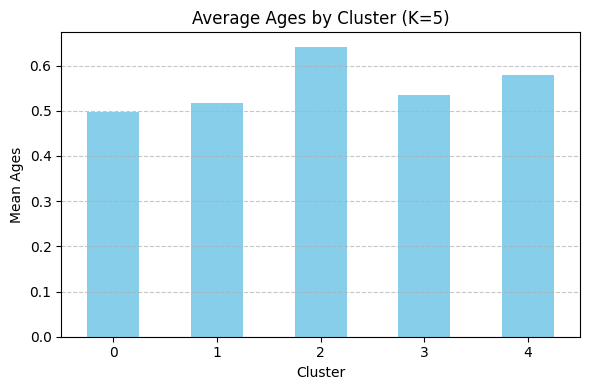

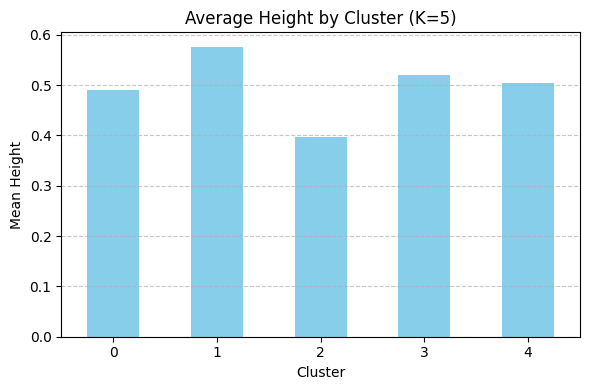

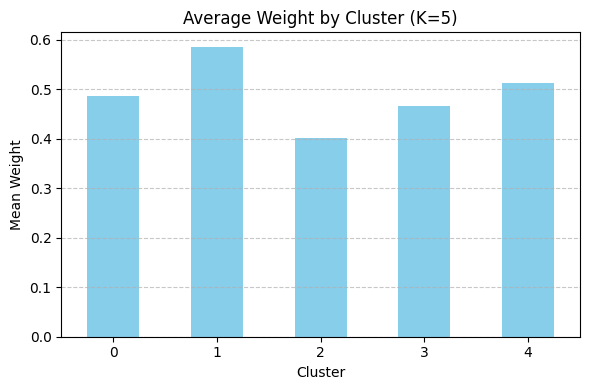

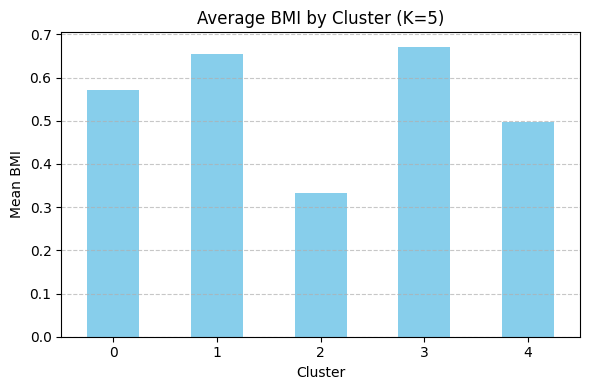

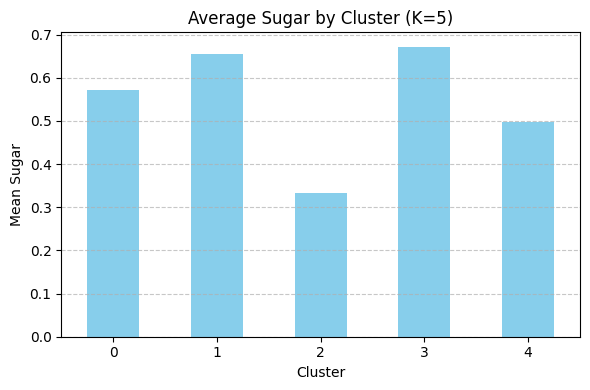

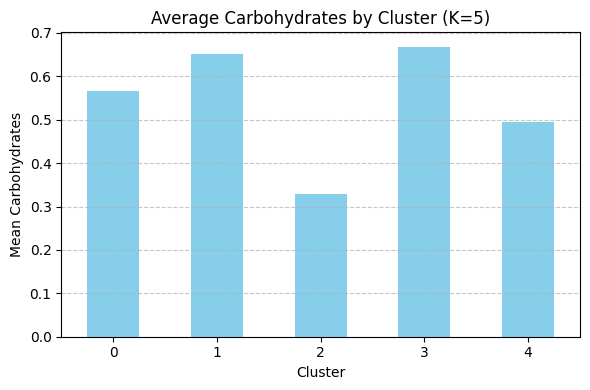

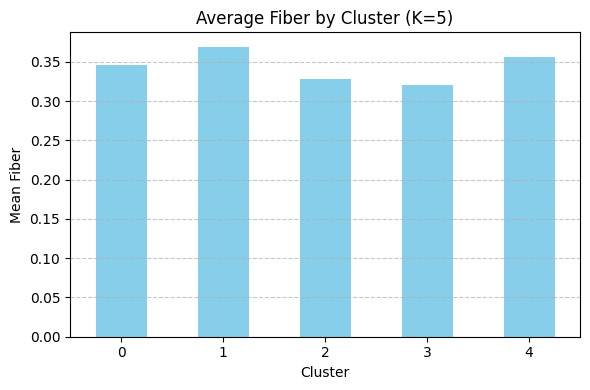

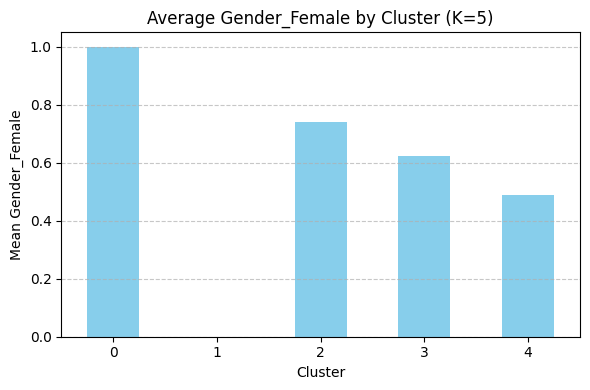

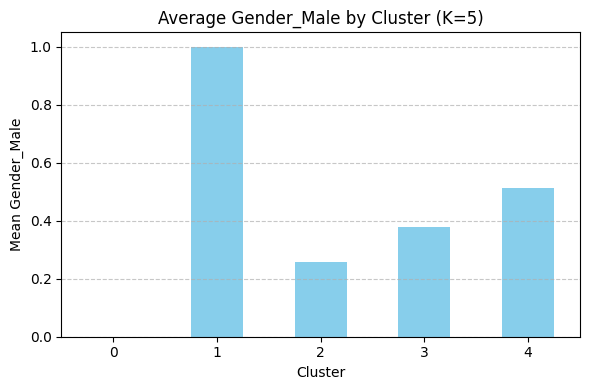

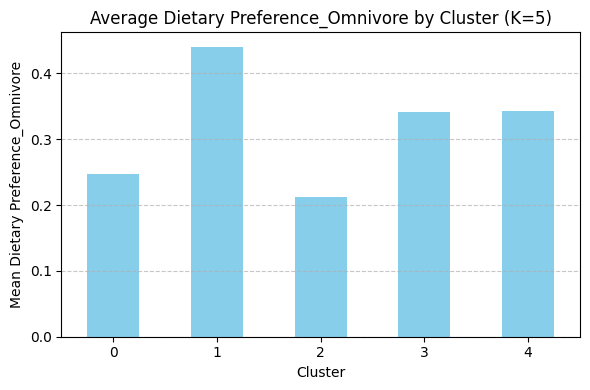

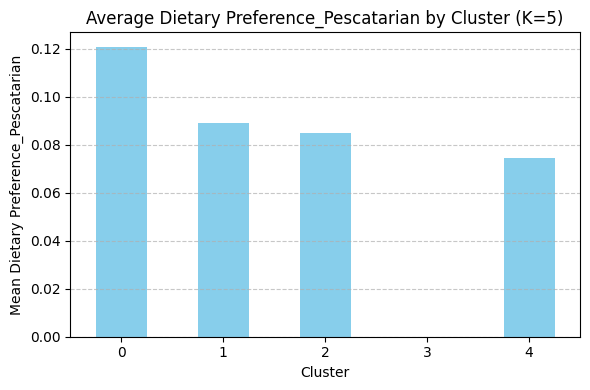

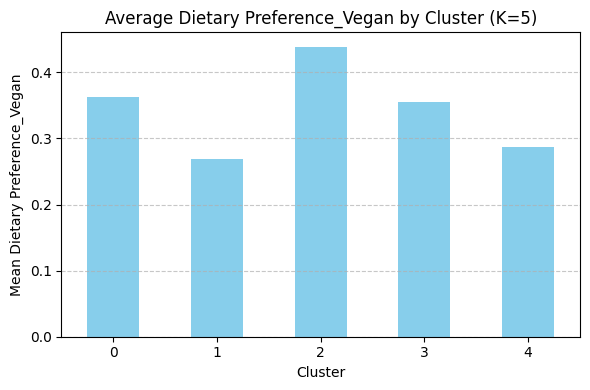

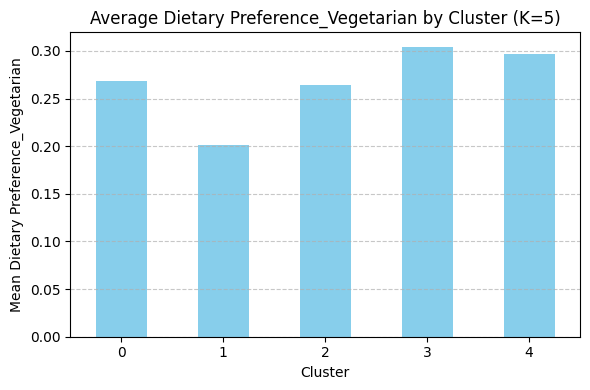

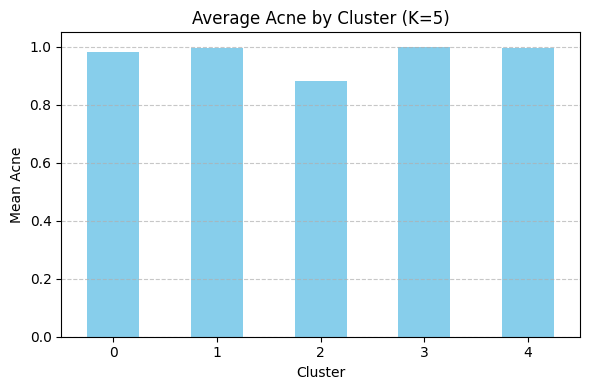

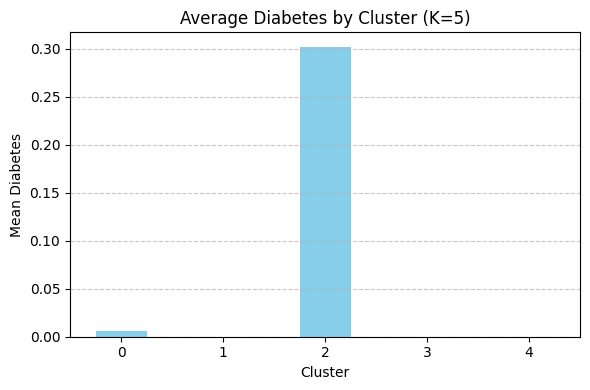

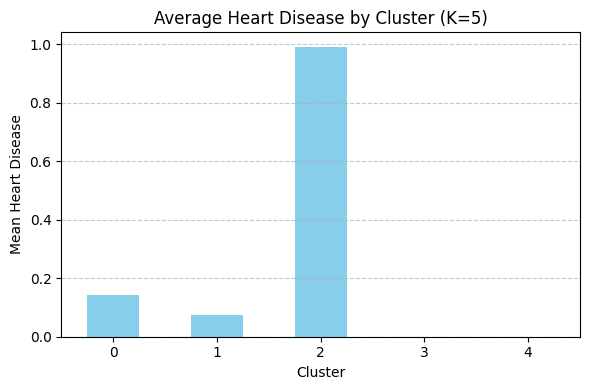

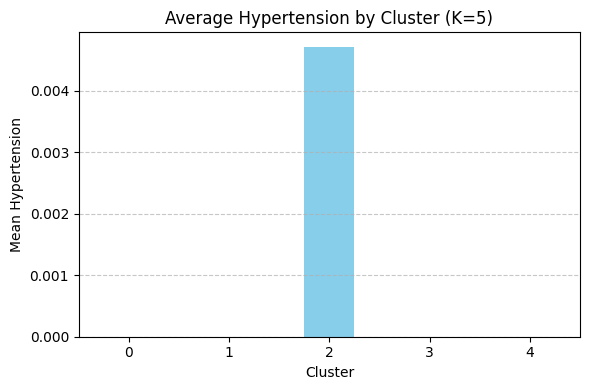

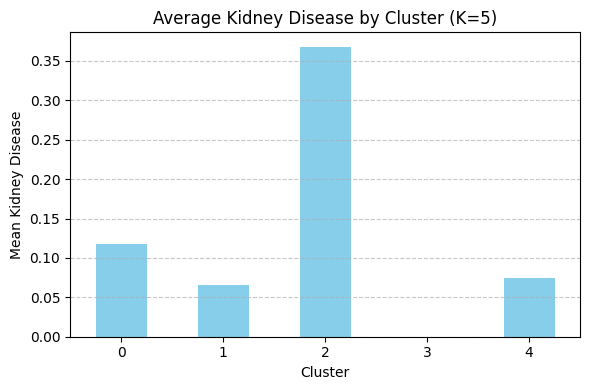

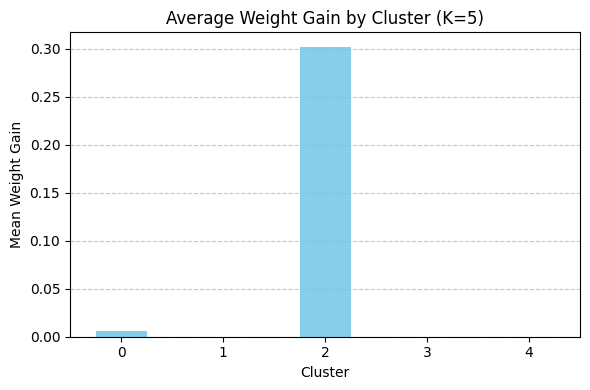

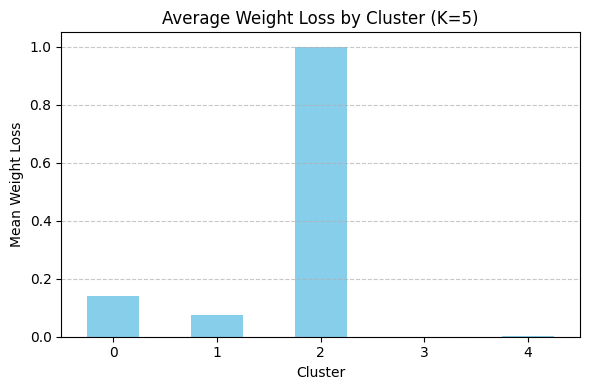

In [47]:
for col in features_only.columns:
    plt.figure(figsize=(6, 4))
    df_clusters.groupby("Cluster_K5")[col].mean().plot(kind='bar', color='skyblue')
    plt.title(f"Average {col} by Cluster (K=5)")
    plt.ylabel(f"Mean {col}")
    plt.xlabel("Cluster")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

**Cluster Interpretation (K=5): Key Characteristics**

- Cluster 0 – Healthy Females

Gender: All female

Health indicators: Very low rates of heart disease, kidney disease, and diabetes

BMI & Activity: Moderate

Dietary profile: Balanced across key nutrients

This group likely represents women with a generally healthy lifestyle and minimal health risks.

- Cluster 1 – Males with Higher Nutritional Intake

Gender: All male

BMI, sugar, fat, and calorie intake: Among the highest

Diet: Highest prevalence of omnivorous eating

This group may be prone to overweight or a diet rich in diverse, high-energy foods.

- Cluster 2 – High-Risk Clinical Group

Medical conditions: Highest rates of diabetes, heart disease, and kidney disease

Weight changes: Most likely to experience both weight gain and loss

Activity level: Very low

BMI: Lowest across all clusters

This cluster represents individuals with complex clinical profiles requiring personalized medical attention.

- Cluster 3 – Highly Active Individuals

Physical activity: Very high (level 4)

Intake: Highest levels of protein, fat, sodium, and calories

BMI: Highest of all clusters

These individuals may be physically active (e.g., athletes) with higher caloric needs and possibly greater muscle mass.

- Cluster 4 – Balanced General Group

Profile: No extreme values; most features close to dataset average

Gender and diet preferences: Mixed

This cluster may reflect a general population subgroup with moderate and stable characteristics.